 Problem 3: Superstatistical Velocity Distribution

A particle in one dimension has a velocity distribution described by superstatistics. The Maxwellian velocity distribution at inverse temperature $\beta$ is

$$
P(v \mid \beta) = \sqrt{\frac{m\beta}{2\pi}} \,
\exp\!\left(- \frac{\beta m v^{2}}{2} \right)
\tag{1}
$$

with $v \in \mathbb{R}$, while the inverse temperature follows an exponential distribution

$$
P(\beta \mid \lambda) = \lambda e^{-\lambda \beta},
\qquad \lambda > 0,\ \beta \in [0,\infty).
\tag{2}
$$

Calculate the conditional distribution $P(\beta \mid v, \lambda)$ using Bayes' theorem and, together with (4), use the Gibbs algorithm to generate joint samples of $(\beta, v)$ for $\lambda = 2$ and $m = 1$ with $v \in [-15,15]$. Demonstrate that the marginal distribution of $v$ is given by

$$
P(v \mid \lambda) =
\frac{\lambda \sqrt{m}}{(m v^{2} + 2\lambda)^{3/2}}
\tag{3}
$$

and that this coincides with the histogram of the generated values of $v$.

In [86]:
import numpy as np
from math import*
import random
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.stats import gamma, norm


In [87]:
lamda = 2
m = 1
n = int(10e7)
vmin = -15
vmax = 15
n_burnin= int(10e5)



In [88]:
def maxwellian(v, beta):
    return sqrt(m * beta / (2 * pi)) * exp(- beta * m * v**2 / 2)


In [89]:
def exponential(beta, lamda):
    return lamda * exp(- lamda * beta)


In [90]:
def teorical_curve(v, lamda, m):
    return (lamda * sqrt(m)) / ((m * v**2 + 2 * lamda)**(3/2))



In [91]:
def sample_beta_v(v, lamda,m):
    #Sample of beta from P(beta | v, lambda)
    shape = 3/2
    rate = m * v**2 / 2 + lamda
    return np.random.gamma(shape, 1/rate)


In [92]:
def sample_v_beta(beta,m):
    #Sample of v from P(v | beta)
    sigma = sqrt(1 / (m * beta))
    # v is in [-15,15]
    while True:
        v = np.random.normal(0, sigma)
        if vmin <= v <= vmax:
            return v


In [93]:
def gibbs_sampling(n, lamda, m):
    beta_samples = []
    v_samples = []
    
    # Initialize with random values
    v_actual = random.uniform(vmin, vmax)
    beta_actual = sample_beta_v(v_actual, lamda,m)
    # Burn-in phase
    for _ in range(n_burnin):
        v_actual = sample_v_beta(beta_actual,m)
        beta_actual = sample_beta_v(v_actual, lamda,m)
        # Sampling phase
    for _ in range(n):
        beta_actual = sample_beta_v(v_actual, lamda,m)
        v_actual = sample_v_beta(beta_actual,m)
        v_samples.append(v_actual)
        beta_samples.append(beta_actual)
       
    print("Muestreo completado.")
    return np.array(beta_samples), np.array(v_samples)



In [94]:
beta_samples, v_samples = gibbs_sampling(n, lamda, m)


Muestreo completado.


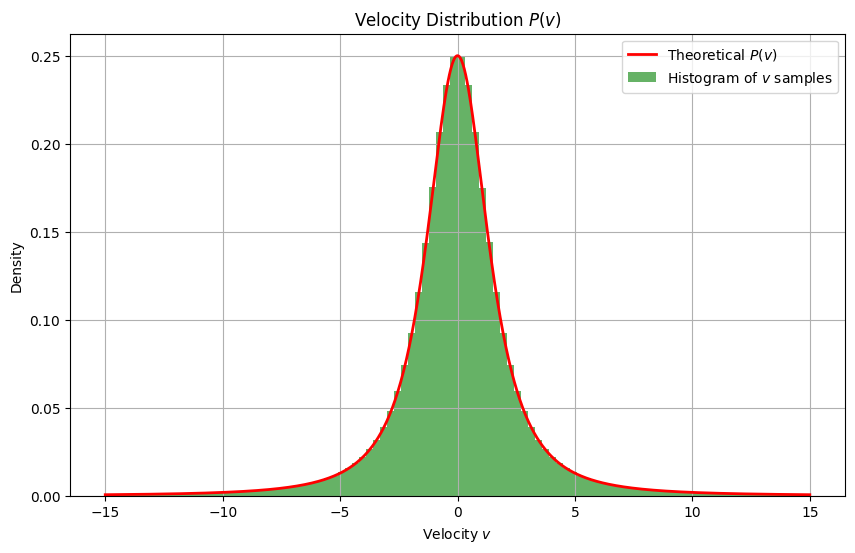

In [96]:
plt.figure(figsize=(10, 6))
vplot = np.linspace(vmin, vmax, 1000)
plt.plot(vplot, teorical_curve(vplot, lamda, m), 'r-', lw=2, label='Theoretical $P(v)$')
plt.hist(v_samples, bins=100, density=True, alpha=0.6, color='g', label='Histogram of $v$ samples')
plt.title('Velocity Distribution $P(v)$')
plt.xlabel('Velocity $v$')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()
